<a href="https://colab.research.google.com/github/Priyagane/Fake-News/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib as plt
Dataset = pd.read_csv("/content/drive/MyDrive/Data_sets/Fake News/train.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
Dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
Dataset.shape

(20800, 5)

In [ ]:
#count of missing Values
Dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#replacing the null values with empty string
Dataset = Dataset.dropna()

In [ ]:
Dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
Dataset['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [5]:
port_stem = PorterStemmer()
def stemming(cont):
  stem_cont = re.sub('[^a-zA-Z]'," ",str(cont))
  stem_cont = stem_cont.lower()
  stem_cont = stem_cont.split()
  stem_cont = [port_stem.stem(word) for word in stem_cont if not word in stopwords.words('english')]
  stem_cont = " ".join(stem_cont)
  return stem_cont


In [6]:
Dataset["text"] = Dataset["text"].apply(stemming)

In [3]:
X = Dataset["text"]
Y = Dataset["label"]

In [8]:
#converting text to numbers
vc = TfidfVectorizer()
vc.fit(X)
X = vc.transform(X)

In [ ]:
#spliting the dataset to train, test
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.2,stratify = Y)

Logistic Regression

In [ ]:
#Trainning the model
lg = LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import classification_report
pred =  lg.predict(X_test)
acc = accuracy_score(pred,Y_test)

In [ ]:
acc

0.9505058791359038

In [ ]:
print( classification_report(Y_test, pred) )

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2072
           1       0.95      0.94      0.94      1585

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



Confusion matrix, without normalization
[[1992   80]
 [ 101 1484]]
Normalized confusion matrix
[[0.96138996 0.03861004]
 [0.0637224  0.9362776 ]]


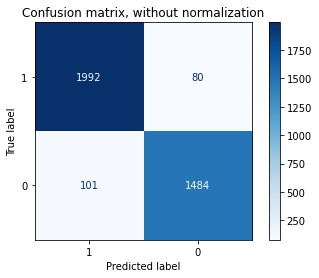

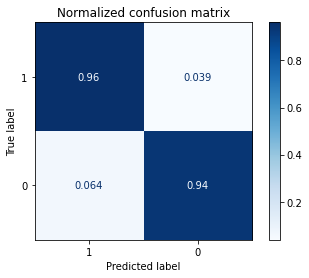

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names= Dataset.label
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lg,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
df = pd.DataFrame({"pred":pred,'y-test':Y_test})
df  

,pred,y-test
7950,0,0
16236,1,1
2122,1,1
10345,0,0
3627,1,1
...,...,...
7688,1,1
18155,1,1
10654,1,1
2410,0,0


RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
pred =  rf.predict(X_test)
acc = accuracy_score(pred,Y_test)
acc

0.9070276182663385

In [ ]:
print( classification_report(Y_test, pred) )

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2072
           1       0.97      0.81      0.88      1585

    accuracy                           0.91      3657
   macro avg       0.92      0.90      0.90      3657
weighted avg       0.91      0.91      0.91      3657



Confusion matrix, without normalization
[[2021   51]
 [ 314 1271]]
Normalized confusion matrix
[[0.9753861  0.0246139 ]
 [0.19810726 0.80189274]]


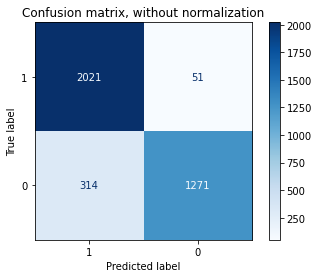

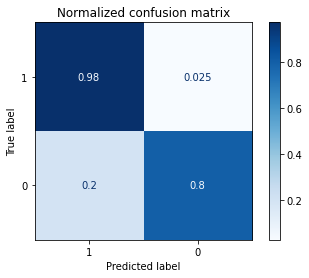

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
rf.fit(X_train,Y_train)
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names= Dataset.label

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Hyperperameter Tunning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.969333 using {'alpha': 0.1}
0.969333 (0.012632) with: {'alpha': 0.1}
0.969333 (0.012632) with: {'alpha': 0.2}
0.969333 (0.012632) with: {'alpha': 0.3}
0.969333 (0.012632) with: {'alpha': 0.4}
0.969333 (0.012632) with: {'alpha': 0.5}
0.969333 (0.012632) with: {'alpha': 0.6}
0.969333 (0.012632) with: {'alpha': 0.7}
0.969333 (0.012632) with: {'alpha': 0.8}
0.969333 (0.012632) with: {'alpha': 0.9}
0.969333 (0.012632) with: {'alpha': 1.0}


In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964000 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.849000 (0.040853) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.849000 (0.040853) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.905333 (0.026924) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.905333 (0.026924) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.932000 (0.020881) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.932000 (0.020881) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.945333 (0.014772) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.945333 (0.014772) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.950333 (0.016017) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.950333 (0.016017) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.954000 

In [ ]:
# example of grid searching key hyperparametres for SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977667 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.971667 (0.012931) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.970333 (0.013780) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.954000 (0.016653) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.971667 (0.012931) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.970333 (0.013780) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.962000 (0.014468) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.972333 (0.012828) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.971000 (0.013000) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.971000 (0.010755) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.958000 (0.019562) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.977667 (0.012565) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.974333 (0.014067) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.958000 (0.019562) with: {'C': 0.01, 'gamma': 'scale',

In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903000 using {'n_estimators': 100}
0.852333 (0.038616) with: {'n_estimators': 10}
0.903000 (0.031953) with: {'n_estimators': 100}
0.903000 (0.031427) with: {'n_estimators': 1000}


In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.966000 using {'max_features': 'log2', 'n_estimators': 1000}
0.857333 (0.037765) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.948333 (0.015934) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.958333 (0.015510) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.845667 (0.026418) with: {'max_features': 'log2', 'n_estimators': 10}
0.952333 (0.019093) with: {'max_features': 'log2', 'n_estimators': 100}
0.966000 (0.015620) with: {'max_features': 'log2', 'n_estimators': 1000}
